In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

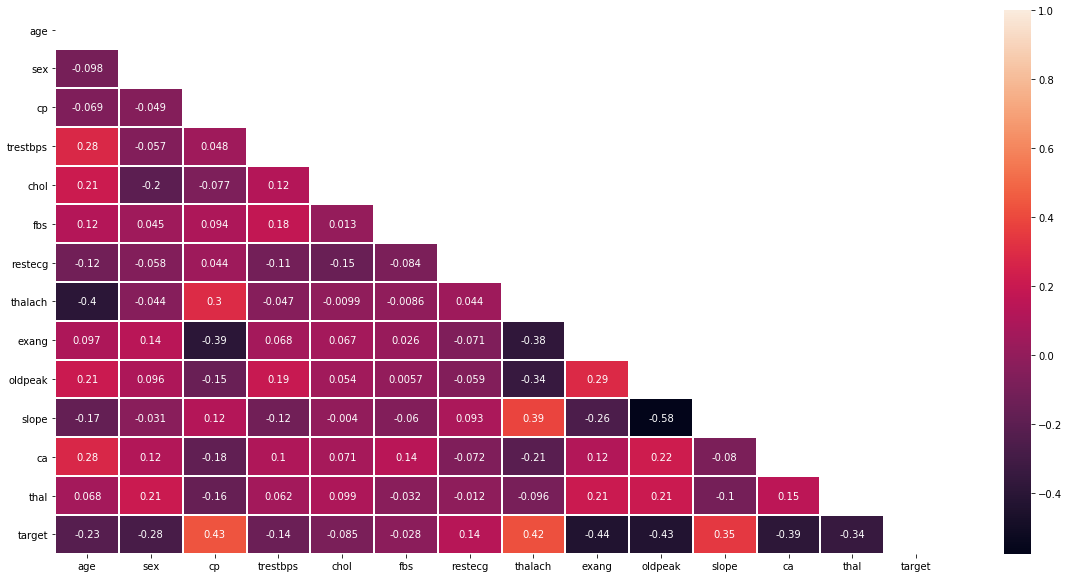

In [6]:
correlation = df.corr()

plt.figure(figsize = (20,10))
mask = np.triu(np.ones_like(correlation , dtype = bool))
sns.heatmap(correlation , mask = mask , annot = True , linewidth = 1)

In [7]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [8]:
df['trestbps']=np.log(df['trestbps'])
df['chol']=np.log(df['chol'])
df['thalach']=np.log(df['thalach'])

np.var(df[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [9]:
features = df.iloc[:,:-1]
label = df['target']

In [10]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(features , label , test_size = 0.2)

print(f'x train shape : {x_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'x test shape : {x_test.shape}')
print(f'y test shape : {y_test.shape}')

x train shape : (242, 13)
y train shape : (242,)
x test shape : (61, 13)
y test shape : (61,)


In [11]:
Accuracies = {}

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 

Accuracy Score of Logistic Regression is 0.8524590163934426


/home/linux/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(24.0, 0.5, 'Actual')

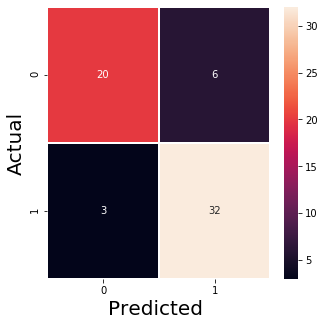

In [12]:

from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

lr_model_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy Score of Logistic Regression is {lr_model_accuracy}')
Accuracies['Logistic'] = lr_model_accuracy
lr_model_confusion = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (5,5))
sns.heatmap(lr_model_confusion , annot = True , linewidth = 1)
plt.xlabel('Predicted ',fontsize=20)
plt.ylabel('Actual',fontsize=20)

Accuracy Score of K-Neighbors is 0.6721311475409836


Text(24.0, 0.5, 'Actual')

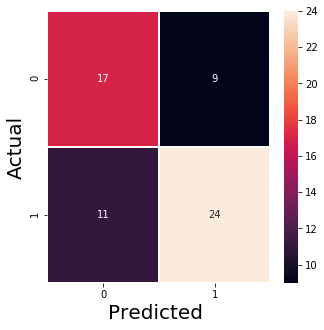

In [13]:

from sklearn.neighbors import KNeighborsClassifier 

neighbors = KNeighborsClassifier(n_neighbors = 8)

neighbors.fit(x_train,y_train)
y_pred = neighbors.predict(x_test)

neighbors_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy Score of K-Neighbors is {neighbors_accuracy}')
Accuracies['KNN'] = neighbors_accuracy
neighbors_confusion = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (5,5))
sns.heatmap(neighbors_confusion , annot = True , linewidth = 1)
plt.xlabel('Predicted ',fontsize=20)
plt.ylabel('Actual',fontsize=20)

Accuracy Score of svc is 0.639344262295082


Text(24.0, 0.5, 'Actual')

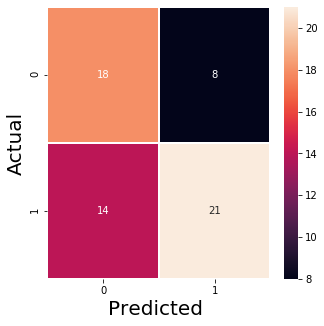

In [14]:

from sklearn.svm import SVC  

svc = SVC()

svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

svc_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy Score of svc is {svc_accuracy}')
Accuracies['SVM'] = svc_accuracy
svc_confusion = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (5,5))
sns.heatmap(svc_confusion , annot = True , linewidth = 1)
plt.xlabel('Predicted ',fontsize=20)
plt.ylabel('Actual',fontsize=20)

Accuracy Score of tree is 0.7049180327868853


Text(24.0, 0.5, 'Actual')

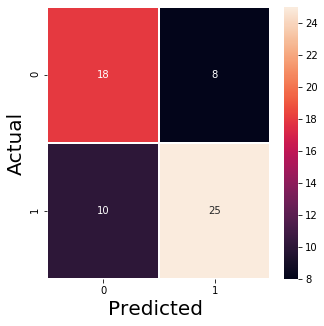

In [15]:

from sklearn.tree import DecisionTreeClassifier  

tree = DecisionTreeClassifier()

tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)

tree_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy Score of tree is {tree_accuracy}')
Accuracies['tree'] = tree_accuracy
tree_confusion = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (5,5))
sns.heatmap(tree_confusion , annot = True , linewidth = 1)
plt.xlabel('Predicted ',fontsize=20)
plt.ylabel('Actual',fontsize=20)

In [16]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(tree, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [17]:
grid_search.best_score_

0.8182823129251702

Accuracy Score of random_forest is 0.8032786885245902


Text(24.0, 0.5, 'Actual')

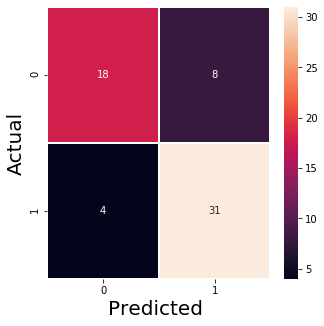

In [18]:

from sklearn.ensemble import GradientBoostingClassifier  

random_forest = GradientBoostingClassifier()

random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)

random_forest_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy Score of random_forest is {random_forest_accuracy}')
Accuracies['forest'] = random_forest_accuracy
random_forest_confusion = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (5,5))
sns.heatmap(random_forest_confusion , annot = True , linewidth = 1)
plt.xlabel('Predicted ',fontsize=20)
plt.ylabel('Actual',fontsize=20)

In [19]:
Accuracies

{'Logistic': 0.8524590163934426,
 'KNN': 0.6721311475409836,
 'SVM': 0.639344262295082,
 'tree': 0.7049180327868853,
 'forest': 0.8032786885245902}

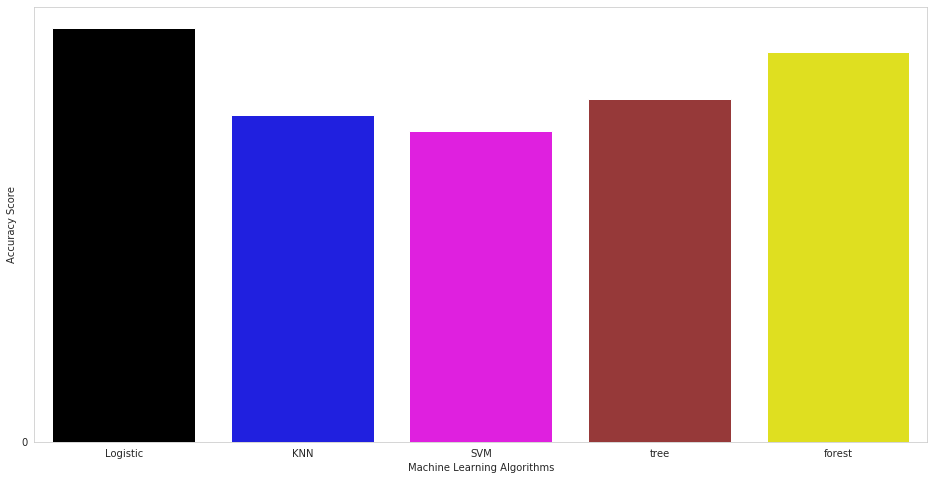

In [20]:
colors = ['Black' , 'blue' , 'magenta','brown','yellow']

sns.set_style('whitegrid')
plt.figure(figsize = (16,8))
plt.yticks(np.arange(0,1200,10))
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy Score')

sns.barplot(x = list(Accuracies.keys()) , y = list(Accuracies.values()) , palette = colors)
plt.show()